# Packages

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Pretty display of variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#  Create directory

In [2]:
import os
import shutil
def createdir(path):
    if not os.path.exists(path):
        os.makedirs(path)
    else:
        shutil.rmtree(path)  # Removes all the subdirectories!
        os.makedirs(path)

In [3]:
# Directory
directory_Figures = 'Results/Figures'
directory_Numeric = 'Results/Numeric'

createdir(directory_Figures)
createdir(directory_Numeric)

# Import dataset

In [4]:
# Load the dataset

dataset_orig = pd.read_excel('Data/data.xlsx', sheet_name = 'data')
dataset_orig

,b,d,a/d,fc,rohsx,fsx,rohsy,fsy,Fiber type,Ef,ffu,WS,rosf,hfe,"V, ex"
0,150,307.5,3.250000,37.50,2.170000,480.0,0.000000,0.0,1,75.0,2300,1,0.626667,276.75,73.150
1,150,307.5,3.250000,37.50,2.170000,480.0,0.000000,0.0,1,75.0,2300,2,0.626667,276.75,90.100
2,150,307.5,3.250000,37.50,2.170000,480.0,0.000000,0.0,2,230.0,3800,1,0.489333,276.75,77.750
3,150,307.5,3.250000,38.00,2.170000,480.0,0.000000,0.0,2,230.0,3800,2,0.489333,276.75,75.900
4,150,307.5,3.250000,37.50,2.170000,480.0,0.000000,0.0,2,230.0,3800,1,1.177333,276.75,122.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,150,242.0,3.305785,45.95,4.327263,526.2,0.268083,526.2,3,270.0,5800,2,0.341250,300.00,248.760
169,150,242.0,3.305785,45.95,4.327263,526.2,0.268083,526.2,3,270.0,5800,2,0.341250,300.00,236.120
170,150,242.0,3.305785,45.95,4.327263,526.2,0.268083,526.2,3,270.0,5800,2,0.341250,300.00,252.790
171,150,242.0,3.305785,45.95,4.327263,526.2,0.268083,526.2,3,270.0,5800,2,0.341250,300.00,237.360


In [5]:
dataset_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   b           173 non-null    int64  
 1   d           173 non-null    float64
 2   a/d         173 non-null    float64
 3   fc          173 non-null    float64
 4   rohsx       173 non-null    float64
 5   fsx         173 non-null    float64
 6   rohsy       173 non-null    float64
 7   fsy         173 non-null    float64
 8   Fiber type  173 non-null    int64  
 9   Ef          173 non-null    float64
 10  ffu         173 non-null    int64  
 11  WS          173 non-null    int64  
 12  rosf        173 non-null    float64
 13  hfe         173 non-null    float64
 14  V, ex       173 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 20.4 KB


## Check missing data in each cell

In [6]:
# make sure no missing data in each cell
dataset_orig.isnull().sum()

b             0
d             0
a/d           0
fc            0
rohsx         0
fsx           0
rohsy         0
fsy           0
Fiber type    0
Ef            0
ffu           0
WS            0
rosf          0
hfe           0
V, ex         0
dtype: int64

In [7]:
missing = dataset_orig.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [8]:
dataset_orig.dtypes

b               int64
d             float64
a/d           float64
fc            float64
rohsx         float64
fsx           float64
rohsy         float64
fsy           float64
Fiber type      int64
Ef            float64
ffu             int64
WS              int64
rosf          float64
hfe           float64
V, ex         float64
dtype: object

## Drop NaN

In [9]:
dataset_orig=dataset_orig.dropna()

In [10]:
# make sure no missing data in each cell
dataset_orig.isnull().sum()

b             0
d             0
a/d           0
fc            0
rohsx         0
fsx           0
rohsy         0
fsy           0
Fiber type    0
Ef            0
ffu           0
WS            0
rosf          0
hfe           0
V, ex         0
dtype: int64

## Drop values with zero that shouldn't be zero

In [11]:
dataset_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
b,173.0,159.907514,41.175074,102.00,150.000000,150.000000,180.000000,300.000000
d,173.0,275.853446,66.412386,159.00,230.000000,272.727273,320.000000,419.000000
a/d,173.0,2.716739,0.464327,1.60,2.500000,2.690000,3.000000,4.900000
fc,173.0,30.525491,10.143784,10.10,23.300000,29.130000,35.200000,61.000000
rohsx,173.0,2.689005,1.319031,0.75,1.600000,2.600000,3.716395,6.155700
fsx,173.0,543.778439,44.322607,457.21,515.000000,545.000000,578.000000,690.000000
rohsy,173.0,0.092665,0.157237,0.00,0.000000,0.000000,0.210000,0.750000
fsy,173.0,128.988439,203.507505,0.00,0.000000,0.000000,276.000000,527.000000
Fiber type,173.0,2.687861,1.331952,1.00,2.000000,2.000000,3.000000,5.000000
Ef,173.0,192.365318,71.053738,31.90,190.000000,225.000000,240.000000,270.000000


# Drop more with specific function

In [12]:
# dataset_orig = dataset_orig[dataset_orig['V (kN)']<2000]
# dataset_orig = dataset_orig[dataset_orig['fyt (MPa)']!=0]
# dataset_orig = dataset_orig[dataset_orig['VMAX (kN)']!=0]
# dataset_orig = dataset_orig[dataset_orig['Vol Trans Reinf Ratio']!=0]

In [13]:
dataset_orig.describe().to_excel("Results/Numeric/Descriptive statistics.xlsx")

dataset_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
b,173.0,159.907514,41.175074,102.00,150.000000,150.000000,180.000000,300.000000
d,173.0,275.853446,66.412386,159.00,230.000000,272.727273,320.000000,419.000000
a/d,173.0,2.716739,0.464327,1.60,2.500000,2.690000,3.000000,4.900000
fc,173.0,30.525491,10.143784,10.10,23.300000,29.130000,35.200000,61.000000
rohsx,173.0,2.689005,1.319031,0.75,1.600000,2.600000,3.716395,6.155700
fsx,173.0,543.778439,44.322607,457.21,515.000000,545.000000,578.000000,690.000000
rohsy,173.0,0.092665,0.157237,0.00,0.000000,0.000000,0.210000,0.750000
fsy,173.0,128.988439,203.507505,0.00,0.000000,0.000000,276.000000,527.000000
Fiber type,173.0,2.687861,1.331952,1.00,2.000000,2.000000,3.000000,5.000000
Ef,173.0,192.365318,71.053738,31.90,190.000000,225.000000,240.000000,270.000000


## Column names

In [14]:
dataset_orig.columns

Index(['b', 'd', 'a/d', 'fc', 'rohsx', 'fsx', 'rohsy', 'fsy', 'Fiber type',
       'Ef', 'ffu', 'WS', 'rosf', 'hfe', 'V, ex'],
      dtype='object')

## Add extra column (columns)

<b> Example: Add one more column to identify specimens with or without stirrups

In [15]:
# df2 = dataset.copy(deep=True)
# def lab(data2):
#     if data2["rohsy"] == 0:
#         return "No stirrup"
#     if data2["rosf"] > 0:
#         return "With stirrups"
       
# df2["stirrup"] = df2.apply(lambda df2:lab(df2) ,axis =1)

In [16]:
# df2

In [17]:
# df2.info

In [18]:
dataset_orig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   b           173 non-null    int64  
 1   d           173 non-null    float64
 2   a/d         173 non-null    float64
 3   fc          173 non-null    float64
 4   rohsx       173 non-null    float64
 5   fsx         173 non-null    float64
 6   rohsy       173 non-null    float64
 7   fsy         173 non-null    float64
 8   Fiber type  173 non-null    int64  
 9   Ef          173 non-null    float64
 10  ffu         173 non-null    int64  
 11  WS          173 non-null    int64  
 12  rosf        173 non-null    float64
 13  hfe         173 non-null    float64
 14  V, ex       173 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 21.6 KB


## Drop irrelevant columns from the dataset or select important columns
[drop columns](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/#:~:text=To%20delete%20rows%20and%20columns,the%20%E2%80%9Caxis%E2%80%9D%20as%201.)

[youtube](https://www.youtube.com/watch?v=lWB12gP2NAc)

In [19]:
dataset_orig.columns

Index(['b', 'd', 'a/d', 'fc', 'rohsx', 'fsx', 'rohsy', 'fsy', 'Fiber type',
       'Ef', 'ffu', 'WS', 'rosf', 'hfe', 'V, ex'],
      dtype='object')

### Drop columns

In [20]:
# # drop irrelevant columns from the dataset if there is any using teh code below
# drop_list = ['References', 'Clear Cover cc [in.]', 'pv (trans. reinf. ratio)', 
#              'Test configuration', 'a [in.]', 'Section depth (h) [in.]']
# dataset_orig = dataset_orig.drop(labels=drop_list, axis=1)
# dataset_orig.head()
# dataset_orig.describe().T

## [Select a specific or multiple columns](https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe)

In [21]:
# # select specific column by its name
# dataset['b']

In [22]:
# # select specific column by its name
# dataset[['b', 'd']]

## Normality test
Check if dataset is normal:

In [23]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(dataset_orig)
normal = normal.apply(test_normality)
print('Is dataset normal?', not normal.any())

Is dataset normal? False


## Select a specific or multiple column using the column index

In [24]:
# dataset_orig.iloc[:, 0:4] # the first to 4th column

 ### [Count number of columns of a DataFrame](https://www.w3resource.com/python-exercises/pandas/python-pandas-data-frame-exercise-57.php)

In [25]:
len(dataset_orig.columns)

15

In [26]:
dataset_orig.shape

(173, 15)

# [Identify outliers](https://www.statology.org/grubbs-test-python/#:~:text=Grubbs'%20Test%20is%20used%20to,have%20at%20least%207%20observations.)

In [27]:
# pip install outlier_utils
import numpy as np
from outliers import smirnov_grubbs as grubbs

for i in range(dataset_orig.shape[1]):
    outl = grubbs.max_test_indices(dataset_orig.iloc[:,i].values.flatten(), alpha=.05);
    print(outl)
print("the indices of the outliers are given above")    

[18, 19, 20, 21, 22, 23]
[]
[118]
[]
[]
[]
[51, 54]
[]
[]
[]
[]
[]
[37]
[]
[]
the indices of the outliers are given above


# Final dataset to use in the network

In [28]:
out_index = [113
             
             
            ]
                       
dataset_no_outliers = dataset_orig.drop(out_index) # dataset without outlier (s)

# Decide which one to use for the network (Select one of the following: orignal datasest or dataset without outliers)

dataset = dataset_orig
# dataset = dataset_no_outliers

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
b,173.0,159.907514,41.175074,102.00,150.000000,150.000000,180.000000,300.000000
d,173.0,275.853446,66.412386,159.00,230.000000,272.727273,320.000000,419.000000
a/d,173.0,2.716739,0.464327,1.60,2.500000,2.690000,3.000000,4.900000
fc,173.0,30.525491,10.143784,10.10,23.300000,29.130000,35.200000,61.000000
rohsx,173.0,2.689005,1.319031,0.75,1.600000,2.600000,3.716395,6.155700
fsx,173.0,543.778439,44.322607,457.21,515.000000,545.000000,578.000000,690.000000
rohsy,173.0,0.092665,0.157237,0.00,0.000000,0.000000,0.210000,0.750000
fsy,173.0,128.988439,203.507505,0.00,0.000000,0.000000,276.000000,527.000000
Fiber type,173.0,2.687861,1.331952,1.00,2.000000,2.000000,3.000000,5.000000
Ef,173.0,192.365318,71.053738,31.90,190.000000,225.000000,240.000000,270.000000


In [29]:
dataset.shape

(173, 15)

# Descriptive statistics on the data

In [30]:
# statistics on each data
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
b,173.0,159.907514,41.175074,102.00,150.000000,150.000000,180.000000,300.000000
d,173.0,275.853446,66.412386,159.00,230.000000,272.727273,320.000000,419.000000
a/d,173.0,2.716739,0.464327,1.60,2.500000,2.690000,3.000000,4.900000
fc,173.0,30.525491,10.143784,10.10,23.300000,29.130000,35.200000,61.000000
rohsx,173.0,2.689005,1.319031,0.75,1.600000,2.600000,3.716395,6.155700
fsx,173.0,543.778439,44.322607,457.21,515.000000,545.000000,578.000000,690.000000
rohsy,173.0,0.092665,0.157237,0.00,0.000000,0.000000,0.210000,0.750000
fsy,173.0,128.988439,203.507505,0.00,0.000000,0.000000,276.000000,527.000000
Fiber type,173.0,2.687861,1.331952,1.00,2.000000,2.000000,3.000000,5.000000
Ef,173.0,192.365318,71.053738,31.90,190.000000,225.000000,240.000000,270.000000


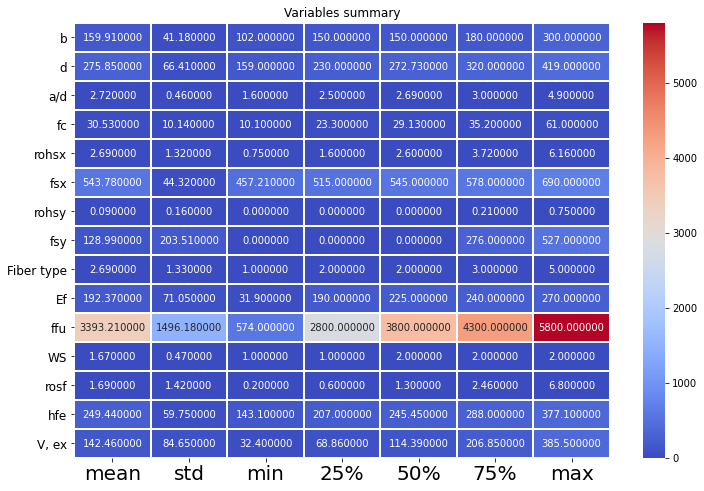

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(round(dataset.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f", cmap='coolwarm')
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show();

In [32]:
# sns.distplot(dataset.iloc[:,-1:])  # the last column which is the output layer

In [33]:
# Let us check the skewness:
print("Skewness = ",dataset.iloc[:,-1:].skew())

Skewness =  V, ex    0.830806
dtype: float64


In [34]:
# include only necessary data or exclude unnecessary columns from the data, in case there are unneccessary columns

#dataset = dataset.iloc[:, 0:12]  # include only the first 11 columns
#dataset

# Correlation

## [Correlation Matrix](https://www.geeksforgeeks.org/python-pandas-dataframe-corr/)
[youtube tutorial](https://www.youtube.com/watch?v=UgtjatBt3vY)

[Pearson coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [35]:
dataset.corr()

,b,d,a/d,fc,rohsx,fsx,rohsy,fsy,Fiber type,Ef,ffu,WS,rosf,hfe,"V, ex"
b,1.000000,0.350726,-0.009645,0.327782,-0.127424,-0.104156,-0.042403,-0.124750,0.324287,0.123749,0.111296,-0.066280,-0.316436,0.308035,0.274267
d,0.350726,1.000000,-0.097920,0.284776,0.175339,0.001630,0.087602,0.001098,0.005072,0.053198,-0.104841,-0.060515,-0.086342,0.921426,0.600642
a/d,-0.009645,-0.097920,1.000000,0.377885,0.554487,-0.241514,0.329590,0.418327,-0.186613,0.017886,-0.000127,0.152648,-0.069299,-0.025338,0.134589
fc,0.327782,0.284776,0.377885,1.000000,0.354823,-0.194220,0.389800,0.337032,-0.012145,0.242030,0.258753,-0.277157,-0.340333,0.397011,0.565765
rohsx,-0.127424,0.175339,0.554487,0.354823,1.000000,-0.084160,0.608152,0.682889,-0.042032,0.081560,0.004405,0.078501,0.168501,0.207448,0.588048
fsx,-0.104156,0.001630,-0.241514,-0.194220,-0.084160,1.000000,-0.295229,-0.309899,0.244968,-0.175841,-0.196246,-0.192182,0.101251,-0.078988,-0.038580
rohsy,-0.042403,0.087602,0.329590,0.389800,0.608152,-0.295229,1.000000,0.873672,-0.175986,-0.004392,-0.004078,0.136635,0.023560,0.172618,0.536985
fsy,-0.124750,0.001098,0.418327,0.337032,0.682889,-0.309899,0.873672,1.000000,-0.110668,0.073290,0.122574,0.285836,-0.057820,0.144666,0.449149
Fiber type,0.324287,0.005072,-0.186613,-0.012145,-0.042032,0.244968,-0.175986,-0.110668,1.000000,0.100007,0.054689,0.066746,0.116874,-0.068655,0.134391
Ef,0.123749,0.053198,0.017886,0.242030,0.081560,-0.175841,-0.004392,0.073290,0.100007,1.000000,0.909284,0.064854,-0.208193,0.133597,0.023877


<b> Another style of correlation matrix color map/heat map

In [36]:
dataset.corr().style.background_gradient(cmap='coolwarm') # default is pearson correlation

,b,d,a/d,fc,rohsx,fsx,rohsy,fsy,Fiber type,Ef,ffu,WS,rosf,hfe,"V, ex"
b,1.000000,0.350726,-0.009645,0.327782,-0.127424,-0.104156,-0.042403,-0.124750,0.324287,0.123749,0.111296,-0.066280,-0.316436,0.308035,0.274267
d,0.350726,1.000000,-0.097920,0.284776,0.175339,0.001630,0.087602,0.001098,0.005072,0.053198,-0.104841,-0.060515,-0.086342,0.921426,0.600642
a/d,-0.009645,-0.097920,1.000000,0.377885,0.554487,-0.241514,0.329590,0.418327,-0.186613,0.017886,-0.000127,0.152648,-0.069299,-0.025338,0.134589
fc,0.327782,0.284776,0.377885,1.000000,0.354823,-0.194220,0.389800,0.337032,-0.012145,0.242030,0.258753,-0.277157,-0.340333,0.397011,0.565765
rohsx,-0.127424,0.175339,0.554487,0.354823,1.000000,-0.084160,0.608152,0.682889,-0.042032,0.081560,0.004405,0.078501,0.168501,0.207448,0.588048
fsx,-0.104156,0.001630,-0.241514,-0.194220,-0.084160,1.000000,-0.295229,-0.309899,0.244968,-0.175841,-0.196246,-0.192182,0.101251,-0.078988,-0.038580
rohsy,-0.042403,0.087602,0.329590,0.389800,0.608152,-0.295229,1.000000,0.873672,-0.175986,-0.004392,-0.004078,0.136635,0.023560,0.172618,0.536985
fsy,-0.124750,0.001098,0.418327,0.337032,0.682889,-0.309899,0.873672,1.000000,-0.110668,0.073290,0.122574,0.285836,-0.057820,0.144666,0.449149
Fiber type,0.324287,0.005072,-0.186613,-0.012145,-0.042032,0.244968,-0.175986,-0.110668,1.000000,0.100007,0.054689,0.066746,0.116874,-0.068655,0.134391
Ef,0.123749,0.053198,0.017886,0.242030,0.081560,-0.175841,-0.004392,0.073290,0.100007,1.000000,0.909284,0.064854,-0.208193,0.133597,0.023877


In [37]:
# you can use the following to know more about the .corr(), remove the # sing and run

#data_FRCM.corr?

## [Seaborn](https://seaborn.pydata.org/)

### [Seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [38]:
# sns.pairplot(dataset, diag_kind='kde')

### Seaborn correlation heatmap

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

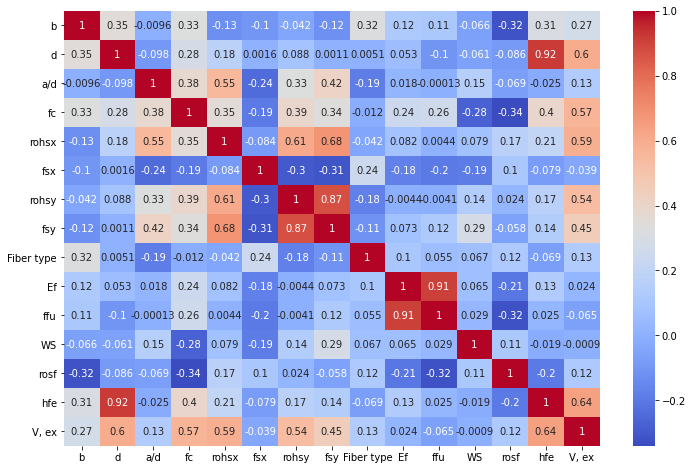

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot = True, cmap='coolwarm')

## Distributions of each parameter in the database

In [40]:
# # Note that running the following code changes the figures style and colour of all figures even in the ANN network
# # Run it once and comment before running the ANN network

# sns.set(font_scale=1.3)  
# # sns.set(rc={'axes.facecolor':'none', 'figure.facecolor':'white'})
# sns.set_style("white")
# sns.set_style("ticks")
# num = [f for f in dataset.columns if dataset.dtypes[f] != 'object'] # for all dataset type different from 'object'
# nd = pd.melt(dataset, value_vars = num)
# n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False,
#                    margin_titles=True
#                    )
# # n1 = n1.map(sns.distplot, 'value')
# n1 = n1.map(plt.hist, 'value')

# # hide title
# n1.set_titles(col_template="", row_template="")  # to hide the title
# n1.set_axis_labels("", "Frequency")
# n1;


## Boxplot for each parameters in the database

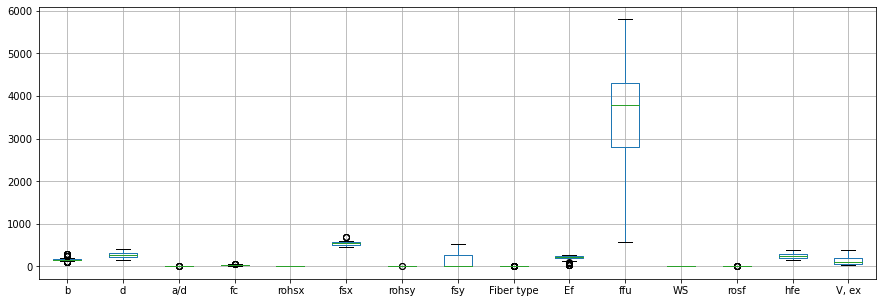

In [41]:
plt.figure(figsize=(15,5))
dataset.boxplot()
plt.show();

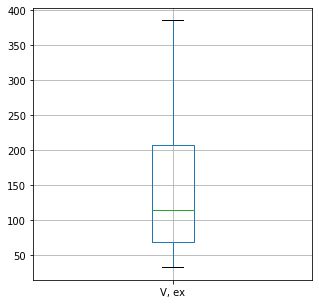

In [42]:
# box plot for output 
plt.figure(figsize=(5,5))
dataset.iloc[:,-1:].boxplot()
plt.show();

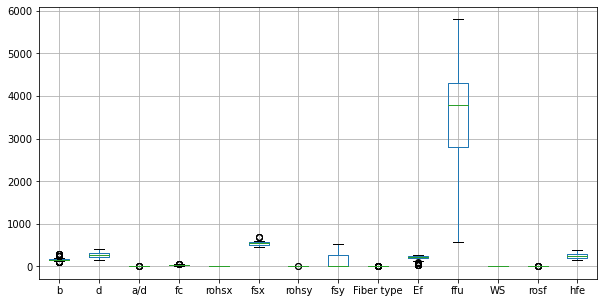

In [43]:
# box plot for input features
plt.figure(figsize=(10,5))
dataset.iloc[:,:-1].boxplot()
plt.show();

# Normalize/Standardise Data

Data is can be normalised or standardised to improve model performance. 
- Normalisation remaps values to fit between 0 and 1.
- Standardisation remaps values to so that the mean of observed values is 0 and the standard deviation is 1. Standardisation assumes that the data fits a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. However, data can still be standardised if this condition is not met, but may yield unreliable results.

In this case, standardisation is chosen after comparing performance of the models.

## [Option 1: Standardize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [44]:
# normalize the inputs with MinMaxScaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
dataset_stn = scaler.fit_transform(dataset)  # standardized dataset

### View the standardized data 

### Convert the standardized numpy array data in to pandas for better view of the data.

you can then also view the descriptive statistics either in table or chart as follows:

In [45]:
# convert the normalized array into pandas
#pd.DataFrame(inp_norm)

dataset_stn_pd = pd.DataFrame(data = dataset_stn, # values
             columns = dataset.columns)   # assign the column name of the "dataset" to the column name of the new data
dataset_stn_pd

,b,d,a/d,fc,rohsx,fsx,rohsy,fsy,Fiber type,Ef,ffu,WS,rosf,hfe,"V, ex"
0,-0.241318,0.477899,1.151795,0.689561,-0.394617,-1.443137,-0.591043,-0.635666,-1.270887,-1.656577,-0.732790,-1.426565,-0.754096,0.458298,-0.821154
1,-0.241318,0.477899,1.151795,0.689561,-0.394617,-1.443137,-0.591043,-0.635666,-1.270887,-1.656577,-0.732790,0.700985,-0.754096,0.458298,-0.620332
2,-0.241318,0.477899,1.151795,0.689561,-0.394617,-1.443137,-0.591043,-0.635666,-0.517930,0.531203,0.272672,-1.426565,-0.851179,0.458298,-0.766654
3,-0.241318,0.477899,1.151795,0.738995,-0.394617,-1.443137,-0.591043,-0.635666,-0.517930,0.531203,0.272672,0.700985,-0.851179,0.458298,-0.788572
4,-0.241318,0.477899,1.151795,0.689561,-0.394617,-1.443137,-0.591043,-0.635666,-0.517930,0.531203,0.272672,-1.426565,-0.364823,0.458298,-0.234088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,-0.241318,-0.511226,1.272286,1.525001,1.245621,-0.397753,1.118861,1.957493,0.235027,1.095791,1.613287,0.700985,-0.955861,0.848519,1.259465
169,-0.241318,-0.511226,1.272286,1.525001,1.245621,-0.397753,1.118861,1.957493,0.235027,1.095791,1.613287,0.700985,-0.955861,0.848519,1.109707
170,-0.241318,-0.511226,1.272286,1.525001,1.245621,-0.397753,1.118861,1.957493,0.235027,1.095791,1.613287,0.700985,-0.955861,0.848519,1.307212
171,-0.241318,-0.511226,1.272286,1.525001,1.245621,-0.397753,1.118861,1.957493,0.235027,1.095791,1.613287,0.700985,-0.955861,0.848519,1.124398


## [Option 2: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [46]:
# normalize the inputs with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_minmax = scaler.fit_transform(dataset)  # Normalized input data

### View the normalized data 

### Convert the normalized numpy array data in to pandas for better view of the data.

you can then also view the descriptive statistics either in table or chart as follows:

In [47]:
# convert the normalized array into pandas
#pd.DataFrame(inp_norm)

dataset_minmax_pd = pd.DataFrame(data = dataset_minmax, # values
             columns = dataset.columns)   # assign the column name of the "dataset" to the column name of the new data
dataset_minmax_pd

,b,d,a/d,fc,rohsx,fsx,rohsy,fsy,Fiber type,Ef,ffu,WS,rosf,hfe,"V, ex"
0,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.00,0.181016,0.330272,0.0,0.064608,0.571154,0.115406
1,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.00,0.181016,0.330272,1.0,0.064608,0.571154,0.163410
2,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.25,0.832003,0.617298,0.0,0.043812,0.571154,0.128434
3,0.242424,0.571154,0.500000,0.548134,0.262686,0.097899,0.000000,0.000000,0.25,0.832003,0.617298,1.0,0.043812,0.571154,0.123195
4,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.25,0.832003,0.617298,0.0,0.147993,0.571154,0.255735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.612744
169,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.576947
170,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.624157
171,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.580459


## Select which one to use: Standardized or MinMax ?

In [48]:
# Select which one to use for the next steps
# choose between: dataset_norm_pd and dataset_minmax_pd
# dataset_n = dataset_stn_pd # standardized normal
dataset_n = dataset_minmax_pd # MinMaxScaler
dataset_n

,b,d,a/d,fc,rohsx,fsx,rohsy,fsy,Fiber type,Ef,ffu,WS,rosf,hfe,"V, ex"
0,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.00,0.181016,0.330272,0.0,0.064608,0.571154,0.115406
1,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.00,0.181016,0.330272,1.0,0.064608,0.571154,0.163410
2,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.25,0.832003,0.617298,0.0,0.043812,0.571154,0.128434
3,0.242424,0.571154,0.500000,0.548134,0.262686,0.097899,0.000000,0.000000,0.25,0.832003,0.617298,1.0,0.043812,0.571154,0.123195
4,0.242424,0.571154,0.500000,0.538310,0.262686,0.097899,0.000000,0.000000,0.25,0.832003,0.617298,0.0,0.147993,0.571154,0.255735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.612744
169,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.576947
170,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.624157
171,0.242424,0.319231,0.516905,0.704322,0.661757,0.296362,0.357443,0.998482,0.50,1.000000,1.000000,1.0,0.021389,0.670513,0.580459


In [49]:
dataset.iloc[:,-1]

0       73.150
1       90.100
2       77.750
3       75.900
4      122.700
        ...   
168    248.760
169    236.120
170    252.790
171    237.360
172    229.015
Name: V, ex, Length: 173, dtype: float64

# Plot output versus all input parameters

In [50]:
# dataset = dataset.drop(['L1'], axis=1)  # drop some column by column name

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   b           173 non-null    int64  
 1   d           173 non-null    float64
 2   a/d         173 non-null    float64
 3   fc          173 non-null    float64
 4   rohsx       173 non-null    float64
 5   fsx         173 non-null    float64
 6   rohsy       173 non-null    float64
 7   fsy         173 non-null    float64
 8   Fiber type  173 non-null    int64  
 9   Ef          173 non-null    float64
 10  ffu         173 non-null    int64  
 11  WS          173 non-null    int64  
 12  rosf        173 non-null    float64
 13  hfe         173 non-null    float64
 14  V, ex       173 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 25.7 KB


## input features names

In [52]:
# input variabels names
names = ['b (mm)',
         'd (mm)',
         'a/d',
         r'$f_{c}$'+' (MPa)',
         r'$\rho_{sx}$'+' (%)',
         r'$f_{sx}$'+' (MPa)',
         r'$\rho_{sy}$'+' (%)',
         r'$f_{sy}$'+' (MPa)',
         'Fiber type',
         r'$E_{f}$'+' (GPa)',
         r'$f_{fu}$'+' (MPa)',
         'Wrapping scheme',
         r'$\rho_{sf}$'+' (%)',
         r'$h_{fe}$'+' (mm)',         
           

        ]

<Figure size 432x288 with 0 Axes>

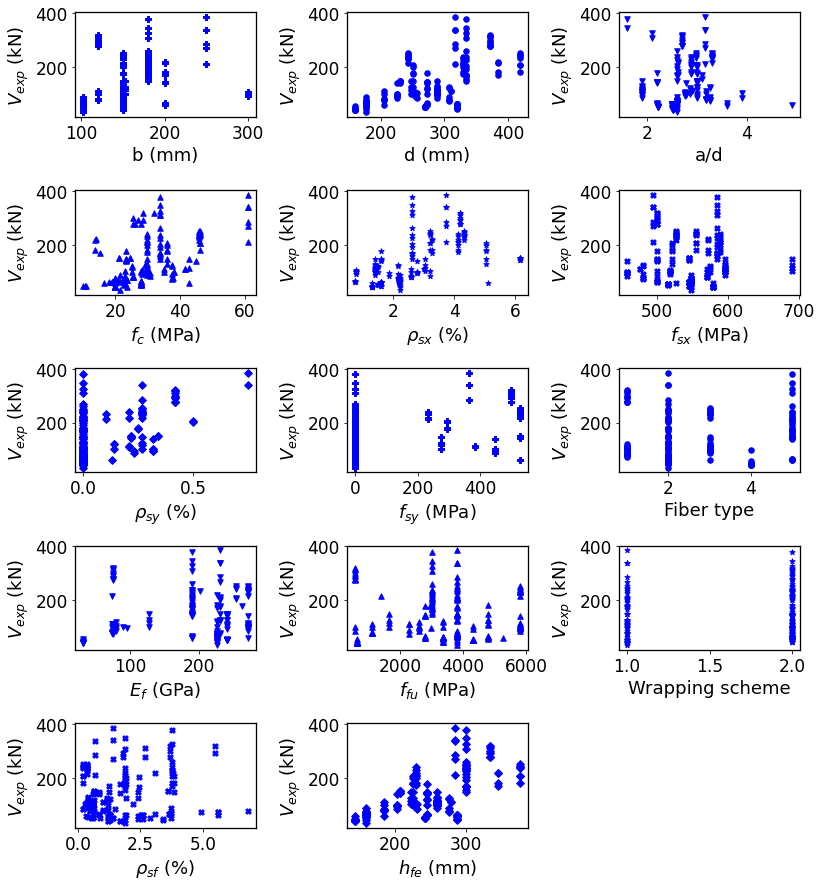

In [53]:
fontsz = 18
# Text font weight
fweight = 'normal'
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
import matplotlib.font_manager
lm = 1
# colour
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
# font style
# matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'
# plt.rcParams['font.style'] = 'italic'

plt.rcParams['axes.linewidth'] = 1.3; # set the value globally
axes_style = {'linewidth':5};

# font size
fsize = 15 # font size
plt.rcParams['font.size'] = '17'  # font size of axis label

markr = ["P", "o", "v", "^", "*", "X", "D", "P", "o", "v", "^", "*", "X", "D"]


plt.figure()
plt.figure(figsize=(13,15))  # plot size
# plt.subplot(1, 2, 1)
for i in range(1,dataset.shape[1]):
    plt.subplot(5, 3, i)
    x=dataset.iloc[:,i-1]
    plt.scatter(x, dataset.iloc[:,-1], label=dataset.columns[i], c='b', marker=markr[i-1], s=30)
    
    plt.ylabel(r'$V_{exp} $' ' (kN)', fontsize=fontsz)
#     plt.xlabel(dataset.columns[i-1], fontsize=fontsz)
    plt.xlabel(names[i-1], fontsize=fontsz)
    
    plt.subplots_adjust(wspace=0.5, hspace=0.7);
    # change axis limit
    axes = plt.gca()
#     axes.set_ylim([0, lm])
#     plt.title(dataset.columns[i-1], fontsize=14)
#     # get axis limits
#     y_min, y_max = axes.get_ylim()
#     x_min, x_max = axes.get_xlim()
#     # add text: 
#     plt.text(x_max-5, y_min+5, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
#          verticalalignment='center', fontsize=fsize, fontweight=fweight)
    
plt.show();